In [24]:
import sys, os, math
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

import torch
import espaloma as esp

from openff.toolkit.topology import Molecule

In [2]:
# grab pretrained model
if not os.path.exists("espaloma_model.pt"):
    os.system("wget http://data.wangyq.net/espaloma_model.pt")

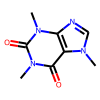

In [4]:
smi = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
mol = Chem.MolFromSmiles(smi)
Draw.MolToImage(mol, size=(100,100))

In [13]:
# define or load a molecule of interest via the Open Force Field toolkit
molecule = Molecule.from_smiles(smi)

In [14]:
# create an Espaloma Graph object to represent the molecule of interest
molecule_graph = esp.Graph(molecule)

In [19]:
# apply a trained espaloma model to assign parameters
espaloma_model = torch.load("espaloma_model.pt")
espaloma_model(molecule_graph.heterograph)

Graph(num_nodes={'g': 1, 'n1': 24, 'n2': 50, 'n3': 86, 'n4': 108, 'n4_improper': 48, 'nonbonded': 324, 'onefour': 92},
      num_edges={('g', 'g_has_n1', 'n1'): 24, ('g', 'g_has_n2', 'n2'): 50, ('g', 'g_has_n3', 'n3'): 86, ('g', 'g_has_n4', 'n4'): 108, ('g', 'g_has_n4_improper', 'n4_improper'): 48, ('g', 'g_has_nonbonded', 'nonbonded'): 324, ('g', 'g_has_onefour', 'onefour'): 92, ('n1', 'n1_as_0_in_n2', 'n2'): 50, ('n1', 'n1_as_0_in_n3', 'n3'): 86, ('n1', 'n1_as_0_in_n4', 'n4'): 108, ('n1', 'n1_as_0_in_n4_improper', 'n4_improper'): 48, ('n1', 'n1_as_0_in_nonbonded', 'nonbonded'): 324, ('n1', 'n1_as_0_in_onefour', 'onefour'): 92, ('n1', 'n1_as_1_in_n2', 'n2'): 50, ('n1', 'n1_as_1_in_n3', 'n3'): 86, ('n1', 'n1_as_1_in_n4', 'n4'): 108, ('n1', 'n1_as_1_in_n4_improper', 'n4_improper'): 48, ('n1', 'n1_as_1_in_nonbonded', 'nonbonded'): 324, ('n1', 'n1_as_1_in_onefour', 'onefour'): 92, ('n1', 'n1_as_2_in_n3', 'n3'): 86, ('n1', 'n1_as_2_in_n4', 'n4'): 108, ('n1', 'n1_as_2_in_n4_improper', 'n4_i

In [21]:
# create an OpenMM System for the specified molecule
openmm_system = esp.graphs.deploy.openmm_system_from_graph(molecule_graph)